In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Create a Dataset

In [2]:
#Create a linear Data
# y = mx+c
weight = 0.7 # m
bias = 0.3 # c 
X = torch.arange(0,1,0.02).unsqueeze(dim=1) #create a 2-D tensor i.e matrix
y = weight * X + bias
print(X.shape)
print(y.shape)
print(X[:5])
print(y[:5])


torch.Size([50, 1])
torch.Size([50, 1])
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])


# Train test split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [5]:
print(X_test)
print(y_test)

tensor([[0.2600],
        [0.7800],
        [0.6000],
        [0.9000],
        [0.3400],
        [0.9600],
        [0.5200],
        [0.5000],
        [0.6400],
        [0.3800]])
tensor([[0.4820],
        [0.8460],
        [0.7200],
        [0.9300],
        [0.5380],
        [0.9720],
        [0.6640],
        [0.6500],
        [0.7480],
        [0.5660]])


# Visualize the data

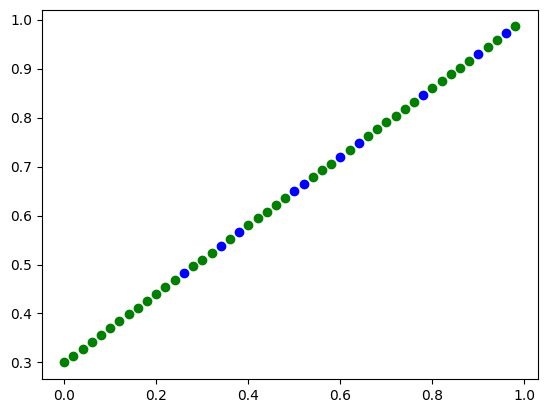

In [6]:
plt.scatter(X_train, y_train, c="g")
plt.scatter(X_test, y_test, c="b")

# Build a model

In [7]:
from torch import nn

#### What our model does:
1. `Start with random values, i.e., weights and bias.`
2. `Look at training data and adjust the random values to become a better representation of data.`

#### How it do so:
1. `Gradient descent.`
2. `Back Propagation.`

In [8]:
# Define the network's architecture, manage its parameters (weights and biases), and provide the logic for the forward pass
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        # tensor created by nn.parameter has properties of nn.module that is why we have used nn.parameter to create tensor not directly initialised tensor
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self,x): 
        return self.weights * x + self.bias #performs linear transformation of x
        


In [9]:
#Create random seed
random_seed= 42 # so that team has the same output , no as such sigmificance
torch.manual_seed(random_seed)
# Instantiate your model
model0 = LinearRegressionModel()

In [10]:
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# aim is to make these weights=0.3367 and biases =0.1288 from the model to move values towards our assumed initial values, i.e., weight = 0.7, bias = 0.3

In [12]:
# Training the model on simple mode
y_pred_simple = model0(X_test)
y_pred_simple

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568]], grad_fn=<AddBackward0>)

In [13]:
# inference mode
with torch.inference_mode():
    y_preds = model0(X_test)
    
y_preds

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568]])

# Visualize Predictions

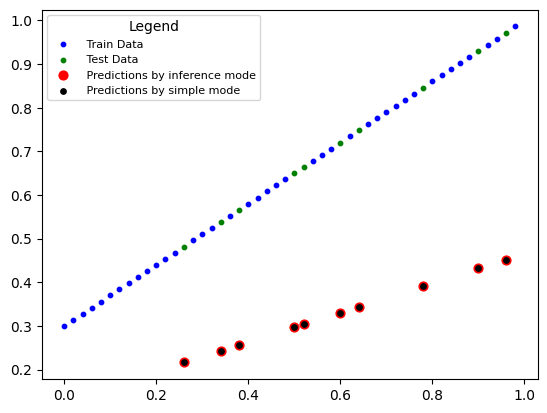

In [14]:
plt.scatter(X_train,y_train, c='b', s=10, label=' Train Data')
plt.scatter(X_test,y_test, c='g', s=10, label=' Test Data')
plt.scatter(X_test,y_preds, c='r', s=40, label=' Predictions by inference mode')
plt.scatter(X_test,y_pred_simple.detach().numpy(), c='black', s=15, label=' Predictions by simple mode')
plt.legend(   frameon=True, title="Legend", fontsize=8,)

# No Loss Functon & Optimizers = Zero learning

# Actual Training (From unknown random params to known params)

`REQUIREMENTS:`
* Loss function
* Optimizer
* TRAINING LOOP
* TESTING LOOP

`EXPLANATION`
1. Need a LOSS FUNCTION/ CRITERION (all are the same)to measure how poorly our model is performing OR loss function measures how wrong our model's parameters are (weights, bias)
2. Need an OPTIMIZER, which takes into account the loss in each iteration / Epoch and adjusts the parameters.

# Loss Function and optimizer

In [15]:
loss_fn = nn.L1Loss()
optimizer_fn = torch.optim.SGD(params=model0.parameters(), lr = 0.01)

# Training and Testing loop

In [16]:
from sklearn.metrics import r2_score #For Regression tasks we use MAE,MSE,R2 etc

In [26]:
epochs=100
epoch_list = []
training_losses = []
testing_losses =[]
for epoch in range(epochs):
    # Step 0 : Put model on training
    model0.train()
    # Step 1 : Setup foward pass
    y_pred_learned = model0(X_train)
    # Step 2: calculate Loss Function
    training_loss=loss_fn(y_pred_learned, y_train)
    training_losses.append(training_loss.detach().numpy())
    training_r2_score = r2_score(y_train.detach().numpy(), y_pred_learned.detach().numpy())
    # Step 3: Optimizer Zero grad
    optimizer_fn.zero_grad()
    # Step 4: back propagation
    training_loss.backward()
    # Step 5: Set up optimizer
    optimizer_fn.step() 
    #Testing loop
    model0.eval()
    with torch.inference_mode():
        # Step 1: Forward Pass
        y_pred_testing = model0(X_test)
        # Step 2: Calculate loss
        testing_loss = loss_fn(y_pred_testing, y_test)
        testing_losses.append(testing_loss.detach().numpy())
        testing_r2_score = r2_score(y_test.detach().numpy(), y_pred_testing.detach().numpy())

    if(epoch%10==0):
        print(f'Epoch: {epoch}| training_loss: {training_loss} | testing_loss: {testing_loss} | model parameters after training:{model0.state_dict()} ')
    



Epoch: 0| training_loss: 0.03980403393507004 | testing_loss: 0.029580067843198776 | model parameters after training:OrderedDict([('weights', tensor([0.5508])), ('bias', tensor([0.3723]))]) 
Epoch: 10| training_loss: 0.034203048795461655 | testing_loss: 0.02517164871096611 | model parameters after training:OrderedDict([('weights', tensor([0.5722])), ('bias', tensor([0.3623]))]) 
Epoch: 20| training_loss: 0.028602052479982376 | testing_loss: 0.020763223990797997 | model parameters after training:OrderedDict([('weights', tensor([0.5937])), ('bias', tensor([0.3523]))]) 
Epoch: 30| training_loss: 0.02300105430185795 | testing_loss: 0.016354799270629883 | model parameters after training:OrderedDict([('weights', tensor([0.6151])), ('bias', tensor([0.3423]))]) 
Epoch: 40| training_loss: 0.01740005984902382 | testing_loss: 0.012063920497894287 | model parameters after training:OrderedDict([('weights', tensor([0.6366])), ('bias', tensor([0.3323]))]) 
Epoch: 50| training_loss: 0.01179906725883483

In [27]:
print(training_r2_score)
print(testing_r2_score)

0.9999746084213257
0.9944579601287842


In [19]:
len(training_losses)
training_losses[0]

array(0.3403112, dtype=float32)

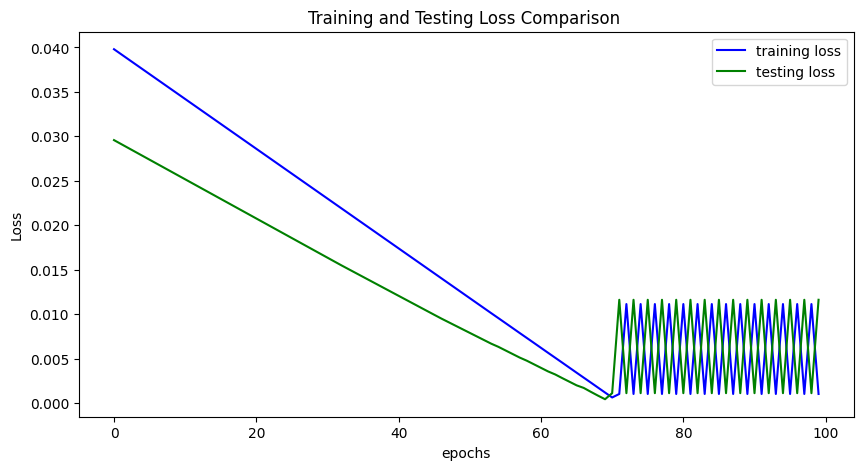

In [28]:
plt.figure(figsize=(10,5))
plt.title("Training and Testing Loss Comparison ")
plt.plot(training_losses, c="b" , label="training loss")
plt.plot(testing_losses,c="g", label="testing loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
            

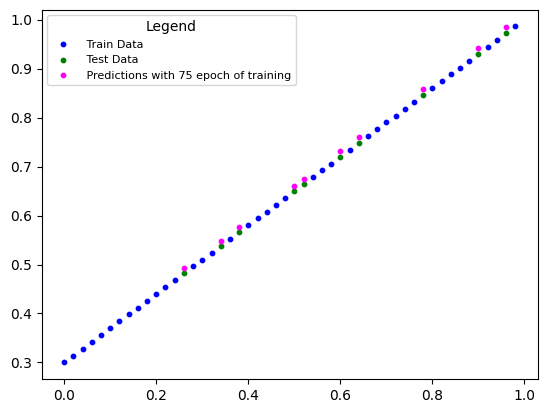

In [29]:
plt.scatter(X_train,y_train, c='b', s=10, label=' Train Data')
plt.scatter(X_test,y_test, c='g', s=10, label=' Test Data')
plt.scatter(X_test,y_pred_testing, c='magenta', s=10, label=' Predictions with 75 epoch of training')
plt.legend(   frameon=True, title="Legend", fontsize=8,)

In [30]:
from pathlib import Path
current_path = Path.cwd()
dir_path = current_path / 'Data' / 'models'
dir_path

WindowsPath('c:/Users/admin/Desktop/Machine Learning/ArtificialIntelligence/DeepLearning/regression/Data/models')

In [23]:
# Save the model

In [31]:
model_path = dir_path / 'slr_state_dict.pth'
torch.save(obj=model0.state_dict(), f=model_path)